In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import sys
sys.path.append("../")

from IPython.display import HTML
import pandas as pd
from adj_matrix.utils import *
# import utils
import networkx as nx
import pygraphviz
import matplotlib.pyplot as plt

# Proyecto Métodos Analíticos
**Análisis de red de criminales en Canadá**

## Introducción

Análisis de redes criminales

¿Existen indicios de una red criminal en Quebec?

Análisis de dos sets de datos

1. Red Caviar (90s)

2. Red Cooffending (00s)

### Metodología 

1. Matríz de adyacencia

2. Medidas de centralidad

    - Grado normalizado

    - Intermediación

    - Eigenvector

3. Detección de comunidades

## Base de datos Caviar

In [2]:
phases, G = download_caviar_data()

### Investigación de red criminal en Canadá

- **110** criminales
- **11** intervenciones telefónicas
- Red de interacciones

### Evolución de las redes a través del tiempo

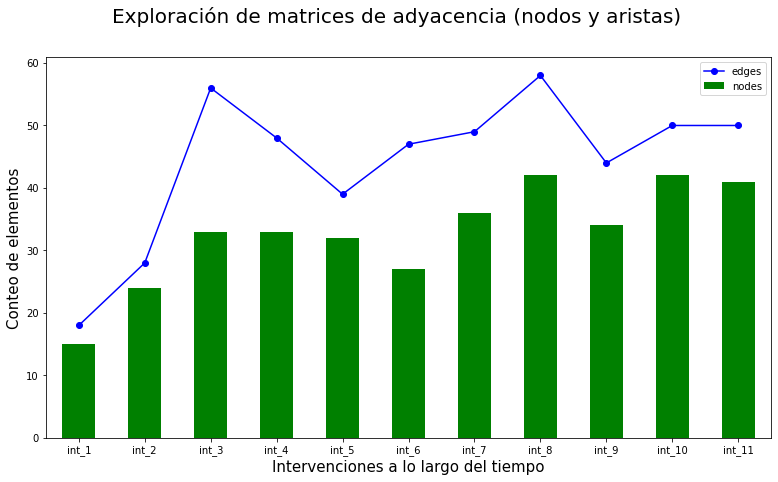

In [3]:
adys_in_time_plot(G)

- Fase 1: crecimiento de la red (intervenciones 1-3)

- Fase 2: decomisión y cambio de actividades (intervenciones 4-5)

- Fase 3: reestructuración (intervenciones 6)

- Fase 4: red bajo estrés (intervenciones 7-11)

### Representación gráfica de las redes (selección)

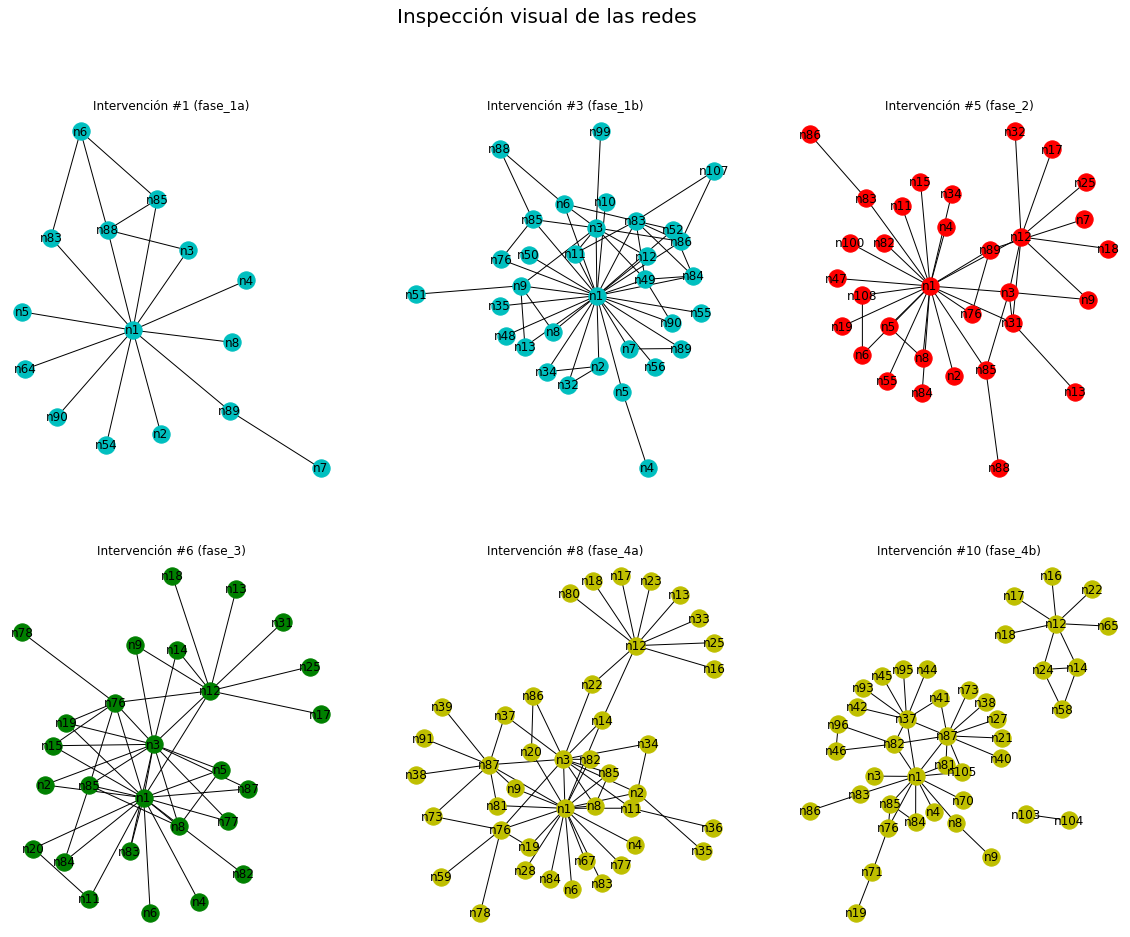

In [4]:
networks_deep_analysis(G, nums_cols, "visual")

### Medidas de centralidad

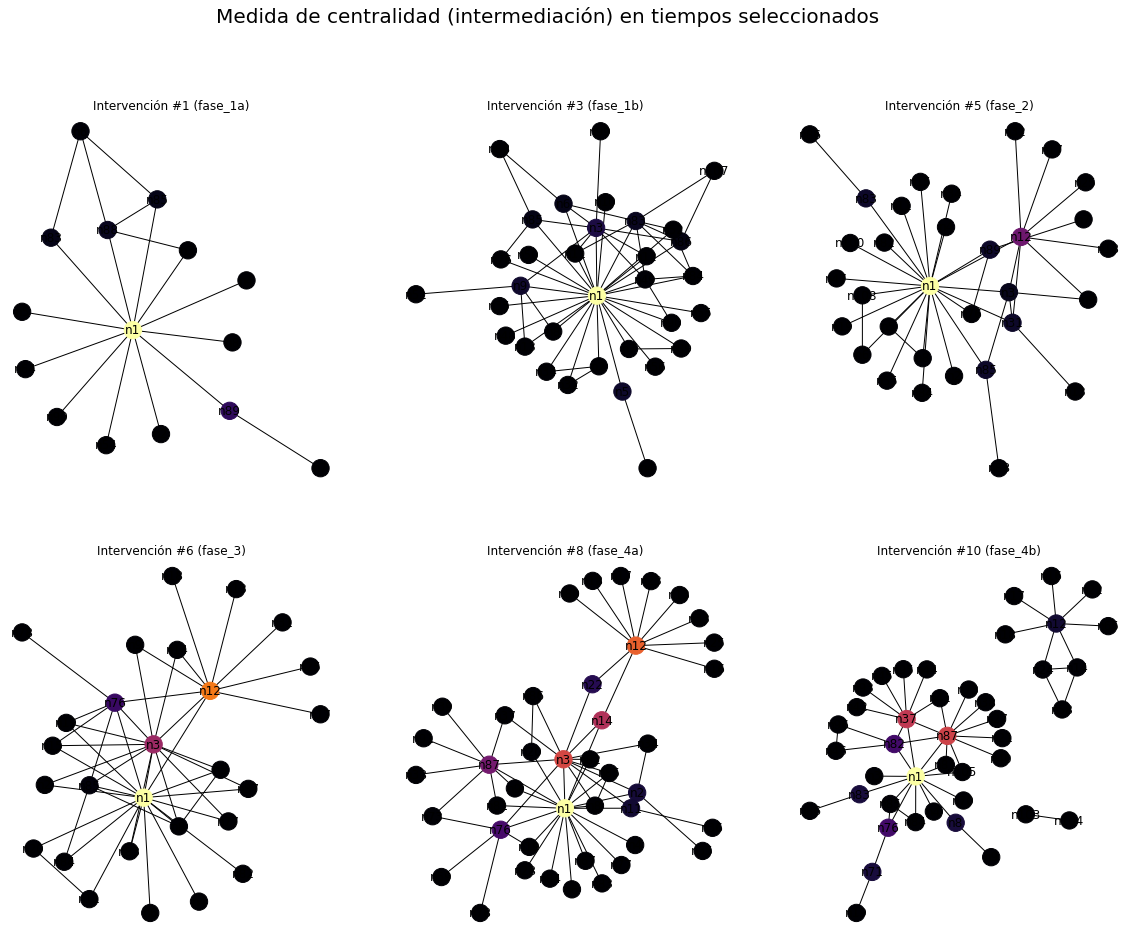

In [5]:
networks_deep_analysis(G, nums_cols, "intermediación")

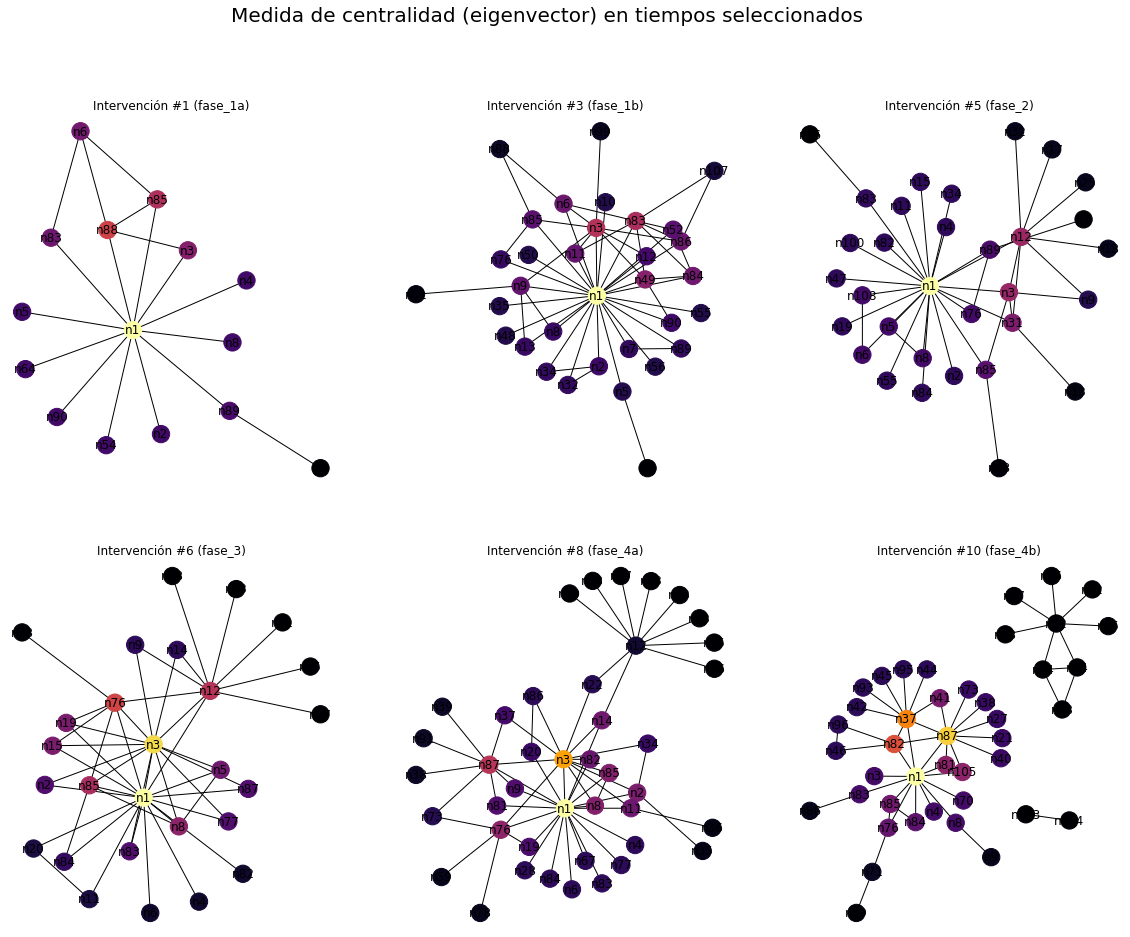

In [6]:
networks_deep_analysis(G, nums_cols, "eigenvector")

### Detección de comunidades

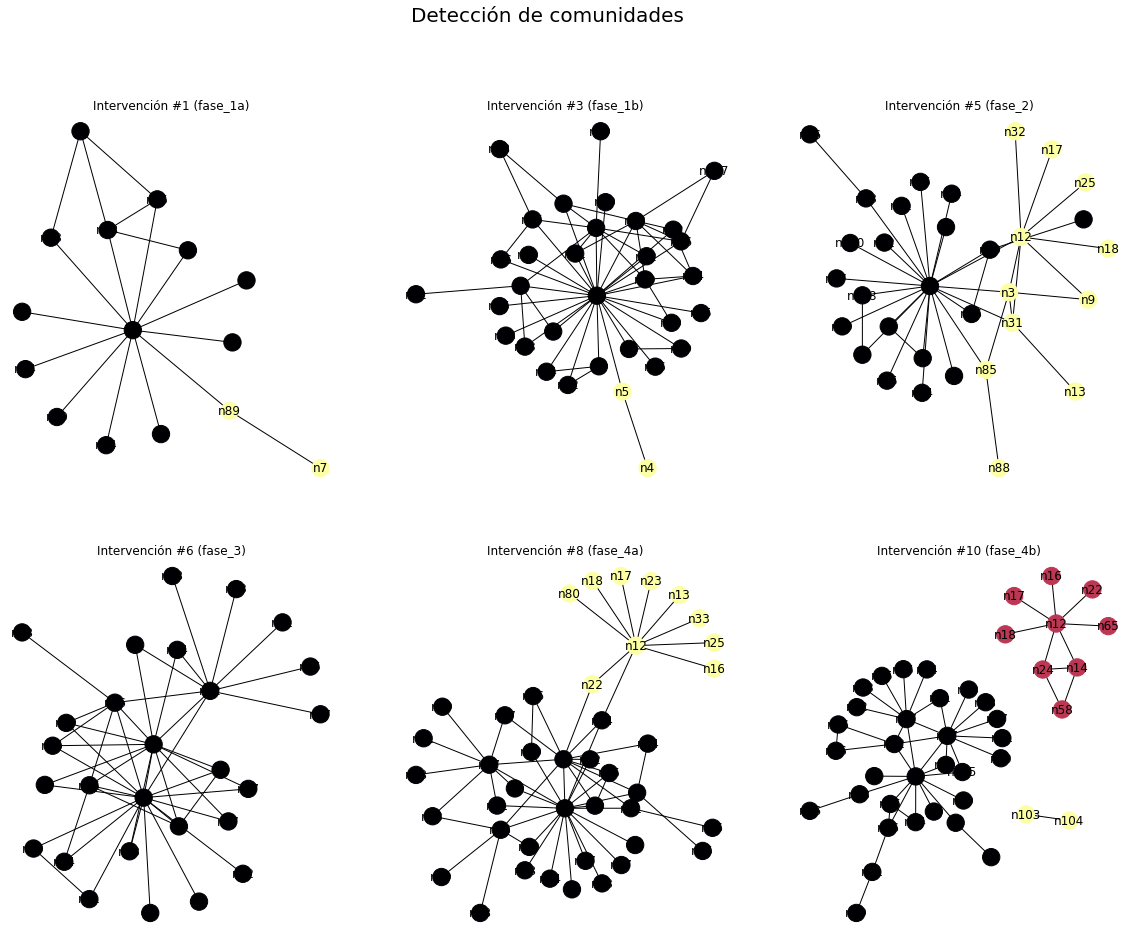

In [7]:
networks_deep_analysis(G, nums_cols, "comunidades")

### Conclusiones

- **Uso de *teoría de redes* para entender características principales de la red:**

    - Importancia del nodo *n1*

    - Surgimiento de sub-red criminal en la Fase 2

    - Importancia del nodo *n12* en la nueva sub-red

    - Otros actores relevantes: *n3*, *n87*, *n82* y *n85*

- **Ejemplo canónico**

    - No hay gran diferencia en las medidas de centralidad por la estructura simple de la red

## Base de datos Cooffending 

### Primera exploración

- Expectativa de encontrar red criminal enorme

In [2]:
df = pd.read_csv("../Cooffending/Cooffending.csv")


In [3]:
df=df.drop_duplicates(subset =["OffenderIdentifier","CrimeIdentifier"])
A=create_adj_matrix(df)
G= create_graph_object(A)

In [4]:
G_2 = filter_number_connections(30, A, G)

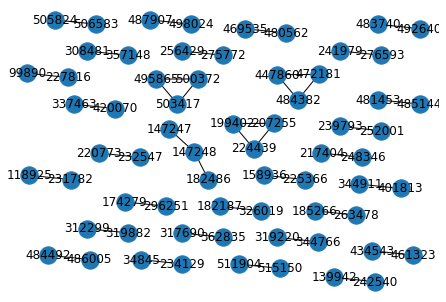

In [6]:
nx.draw(G_2, pos=nx.drawing.nx_agraph.graphviz_layout(G_2), with_labels=True)

- Más bien se encontraron muchas redes fragmentadas

- Enfoque en analizar redes particulares

### Uso de gephy

In [3]:
HTML('<iframe width="2000" height="900" src="http://[::]:8000/" frameborder="0" allowfullscreen></iframe>')

/Users/rp_mbp/Documents/ReposRob_RobPer/ITAMmcd/semestre_2/Metodos_Analiticos_CD/Venv_MetAnaCD/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Selección de casos

#### Caso 1: red de robo domiciliario

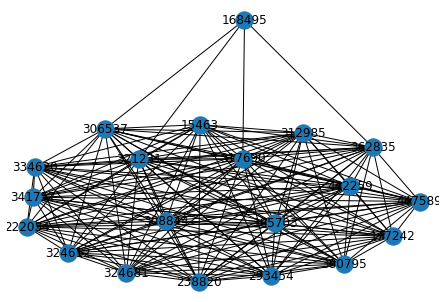

In [7]:
Gr_top_0 = G.subgraph(Gccr[0])
nx.draw(Gr_top_0, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_0), with_labels=True)

- Poca diferencia en las medidas de centralidad debido a simetría

- Apoyo de análisis estadístico

- Operación concentrada geográficamente

- Red simétrica exepto por 1 nodo (fundador)

#### Caso 4: la red roba tineditas

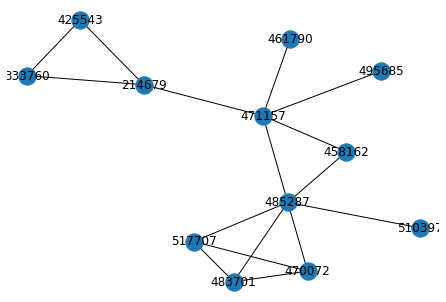

In [35]:
Gr_top_4 = G.subgraph(Gccr[3])
nx.draw(Gr_top_4, pos=nx.drawing.nx_agraph.graphviz_layout(Gr_top_4), with_labels=True)

- Organización con historial de robos y fraudes con tarjeta de crédito

- Única red donde operan mujeres (no centrales)

### Conclusiones

- Muchos criminales fragmentados en Quebec

- Podríamos esperar estructuras de redes diferentes en países como México

- *Teoría de redes* para entender el comportamiento de la red

# Gracias